In [4]:
import numpy as np
from scipy.stats import norm, t

import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams.update({'font.size': 22})
plt.rcParams['lines.linewidth'] = 3

import check_lab02 as p

ME 3263 Introduction to Sensors and Data Analysis (Fall 2018)
=====================================

Lab #2 - Static beam deflections with strain gage
=====================================

# What is a Strain Gage?

A strain gage consists of a looped wire that is embedded in a thin backing. Two
copper coated tabs serve as solder points for the leads. See Figure 1a. The
strain gage is mounted to the structure, whose deformation is to be measured. As
the structure deforms, the wire stretches (increasing its net length ) and its
electrical resistance changes: $R=\rho L/A$, where $\rho$ is the material
resistivity, $L$ is the total length of the wire, and $A$ is the cross sectional
area of the wire.  Note that as $L$ increases, the cross sectional area changes as
well due to the Poisson contraction; the resistivity also changes.

![Figure 1: a) A typical strain gage. b) One common setup: the gage is
mounted to measure the x-direction strain on the top surface. It's
engaged in a quarter bridge configuration of the Wheatstone bridge
circuit.](./figure_01.png)

*Figure 1: a) A typical strain gage. b) One common setup: the gage is
mounted to measure the x-direction strain on the top surface. It's
engaged in a quarter bridge configuration of the Wheatstone bridge
circuit.*

# Validate static strain gage measurements

In this lab we will calibrate strain measurements using Euler-Bernouli beam theory
kinematics \[1\]. The axial strain in a beam is directly proportional to the distance
from the neutral axis and curvature as such

$\epsilon_x=-\kappa z$. (1)

The curvature of the beam is approximated as such

$\kappa=\frac{d^2 w}{dx^2}$. (2)

Equations 1 and 2 relate beam deflection to axial strain. These are called
kinematic equations because they define the geometry of the beam deflection. 

The Euler-Bernouli beam theory uses Newton's second law (kinetics) and Hooke's
law (constitutive) to derive the linear equations of motion for one dimensional
deformable objects \[1,4\]. The relation between a static applied force q(x) and static
deflection w(x) is as such

$\frac{\partial^2}{\partial x^2}\left(EI\frac{\partial^2 w}{\partial
x^2}\right)=q(x)$ (3)

where $E$ is the Young's modulus, $x$ is the distance along the neutral axis,
and $I$ is the second moment of area of the beam's cross-section. For a
rectangular cross-section $b \times t$, width by thickness the second moment of
area is

$I=\frac{bt^3}{12}$. (4)

We will design our strain gage validation such that $E$ and $I$ are not necessary. The boundary conditions for a clamped beam that is
deflected by a distance $\delta$ are $w(0)=0$, $w'(0)=0$, $w(L)=\delta$, and
$w''(L)=0$. Therefore, the functions $w(x)$ and $w''(x)$ can be determined by
integrating equation 3 four times and using the four boundary conditions as such

$w(x)=-\frac{1}{2}\left(\frac{\delta}{L^3}x^3-3\frac{\delta}{L^2}x^2\right)$ (5a)

and the curvature 

$w''(x)=-\left(3\frac{\delta}{L^3}x-3\frac{\delta}{L^2}\right)$ (5b)

Using equations 5a-b, the only quantities needed to determine strain at a given
location on a linear, homogeneous beam are $z$, $\delta$, $w(L)$, and $L$. 

![Figure 2: Diagram of the validation process. The strain gage is placed at a distance $x_{SG}$ from the cantilever support. A linear-elastic beam of length $L$ is deflected by distance, $\delta$.](./figure_02.png)

*Figure 2: Diagram of the validation process. The strain gage is placed at a distance $x_{SG}$ from the cantilever support. A linear-elastic beam of length $L$ is deflected by distance, $\delta$.*

-   Apply a known tip displacement  as seen in Figure 2.  Measure and record the strain at your strain
    gage location, the displacement, $\delta$ and length where load was applied,
    $L$.

-   Calculate the strain at the location of the strain gage using equations 1,2,
    and 5a-b.
    
Below are two functions that calculate displacement and curvature given a bar of length `L`, that is deflected by a distance, `delta`.

In [2]:
def disp_at_x(x,L,delta):
    '''returns the displacement w(x) given the position, x, 
    length of bar, L, and displacement at L, delta'''
    wx=-1/2*(delta/L**3*x**3-3*delta/L**2*x**2)
    return wx

def k_at_x(x,L,delta):
    '''returns the curvature w''(x) given the position, x, 
    length of bar, L, and displacement at L, delta'''
    wx=-(3*delta/L**3*x-3*delta/L**2)
    return wx


In [3]:
w20mm=disp_at_x(20,400,10)
k20mm=k_at_x(20,400,10)
print('displacement of 400 mm bar deflected 10 mm, 20 mm from support =%1.3f mm'%w20mm)
print('   curvature of 400 mm bar deflected 10 mm, 20 mm from support =%1.3f 1/m'%(k20mm*1000))

displacement of 400 mm bar deflected 10 mm, 20 mm from support =0.037 mm
   curvature of 400 mm bar deflected 10 mm, 20 mm from support =0.178 1/m


# Problem 1

If your beam is 400 mm long by 10 mm thick and it deflects 15 mm at the tip, determine the following:

a. displacement `w400` of the beam 20 mm from the base

b. the curvature `k400` of the beam 20 mm from the base 

c. the strain `e400` of the beam 20 mm pixels from the base

In [ ]:
# your work here

p.check_p01(w400,k400,e400)

Text(0.5, 1.0, 'Shape of deflected cantilever beam')

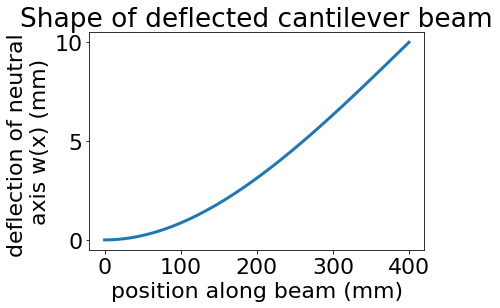

In [5]:
x=np.linspace(0,400)
wx=disp_at_x(x,400,10)
plt.plot(x,wx)
plt.xlabel('position along beam (mm)')
plt.ylabel('deflection of neutral \naxis w(x) (mm)')
plt.title('Shape of deflected cantilever beam')

Text(0.5, 1.0, 'Curvature of deflected cantilever beam')

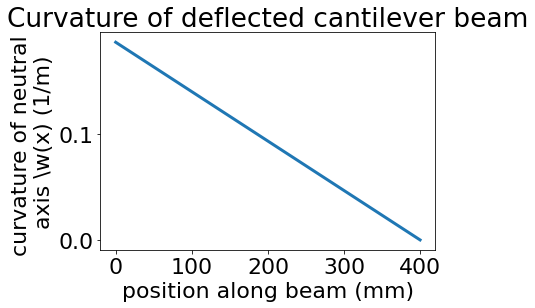

In [8]:
x=np.linspace(0,400)
kx=k_at_x(x,400,10)
plt.plot(x,kx*1000)
plt.xlabel('position along beam (mm)')
plt.ylabel('curvature of neutral \naxis \\w(x) (1/m)')
plt.title('Curvature of deflected cantilever beam')

# Problem 2

If your beam is 400 mm long by 10 mm thick and it deflects 15 mm at the tip, determine the position along the beam for the following:

a. Where is the maximum deflection in the beam? save as `x_max_defl`

b. Where is the maximum curvature in the beam? save as `x_max_curv`

c. Where is the maximum strain in the beam? save as `x_max_strain`

In [ ]:
import check_lab02 as p

p.check_p02(x_max_defl,x_max_curv,x_max_strain)

# Measure constitutive properties

## Constitutive Model
Now the strain gage should be calibrated. We need to determine the Young's modulus, $E$ and second moment of area, $I$. This measurement requires three components: kinematic (which we solved in the validation), kinetic ($\sum{F}=0$), and a constitutive model (Hooke's Law). The constitutive equation for a linear-elastic beam subject to a moment is as such

$M=EI\kappa$. (6)

In equation 6, $M$ is the applied moment, $E$ is the Young's modulus, $I$ is the second moment of inertia of the area of the beam, and $\kappa$ is the curvature of the beam. The constant $I$ is based upon the geometry from equation 4. The material constant $E$ is unknown. 

Use the weights to apply forces at different distances, $r$, from the support as seen in Figure 3. Increasing the weight or the distance the weight is applied will increase the applied moment. Use Table 1 to record the trial no., strain, force, distance, and moment. Use at least two trials per measurement. 

![Figure 3: A linear-elastic beam of length $L$ has a force applied at distance, $r$. 
The strain gage is placed at a distance $x_{SG}$ from the cantilever support.](./figure_03.png)

*Figure 3: A linear-elastic beam of length $L$ has a force applied at distance, $r$. 
The strain gage is placed at a distance $x$ from the cantilever support.*


## Fitting your data to your model

Once you have filled in a number of data points for $\kappa$ and $M$, you can use a linear regression to determine the slope of the data. The constitutive model in equation (6) predicts that the moment and curvature will be related by a proportional constant, $EI$. If we know $EI$, the total squared error is as such

$SSE=\sum_i^N{(M_i-EI\kappa_i)^2}$ (7)

where SSE is the sum of squares error between the predicted moment and measured moment for the $i^{th}$ measurement with $N$ total measurements [\[2\]](https://www.amazon.com/Numerical-Methods-Engineers-Steven-Chapra/dp/0073401064). We can choose a of $EI$ that minimizes $SSE$, but it will never be zero. Below is an example calculation for a linear least squares regression in python for a beam with cross-section $12\times3$ mm.

In [5]:
k=np.array([6.95685737e-07, 9.93992373e-06, 3.25200211e-05, 3.55750721e-05,
       5.32023782e-05, 7.48128585e-05, 7.61625461e-05, 8.54476229e-05,
       1.02089509e-04, 1.02841452e-04, 1.32351731e-04, 1.43996022e-04,
       1.45204793e-04, 1.56867759e-04, 1.73435915e-04, 1.95625232e-04,
       2.00670618e-04, 2.12900332e-04, 2.24582886e-04, 2.41141396e-04,
       2.45991618e-04, 2.55608426e-04, 2.76117673e-04, 2.96128593e-04,
       3.07157389e-04, 3.20509718e-04, 3.20363196e-04, 3.35535814e-04,
       3.53706984e-04, 3.64130433e-04])
M=np.array([ 0.        ,  23.82866379,  47.65732759,  71.48599138,
        95.31465517, 119.14331897, 142.97198276, 166.80064655,
       190.62931034, 214.45797414, 238.28663793, 262.11530172,
       285.94396552, 309.77262931, 333.6012931 , 357.4299569 ,
       381.25862069, 405.08728448, 428.91594828, 452.74461207,
       476.57327586, 500.40193966, 524.23060345, 548.05926724,
       571.88793103, 595.71659483, 619.54525862, 643.37392241,
       667.20258621, 691.03125   ])

Best fit for Young's Modulus is 70.2 +/- 0.3 GPa


Text(0, 0.5, 'Moment (N-mm)')

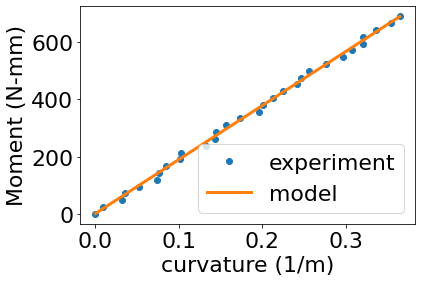

In [23]:
from scipy.optimize import curve_fit

def func(x,EI):
    return EI*x

EI,pcov=curve_fit(func, k, M)
EI_error=np.sqrt(pcov[0,0])
I=12*3**3/12.0
print("Best fit for Young's Modulus is %1.1f +/- %1.1f GPa"%(EI/I*1e-3,EI_error/I*1e-3))

plt.plot(k*1e3,M,'o',label='experiment')
plt.plot(k*1e3,func(k,EI),label='model')
plt.legend()
plt.xlabel('curvature (1/m)')
plt.ylabel('Moment (N-mm)')

*Note:*

The least-squares method used above can be used to fit any function to a data set. You would just need to update the `func` definition to return the desired function based upon your unkown fitting constants. 

The outout `popt` is the covariance matrix [\[3\]](./least_squares-error_with_covariance.pdf). In practice, we can use the square root of the diagonal terms to estimate the error in our least-squares fit. We make a few assumptions when performing this best-fit:

1. There is a random error in the measured  dependent variable (here the moment $M$). 

2. There is no error in the reported independent variable (here the curvature $\kappa$).

3. The measured dependent variables are uncorrelated with the measured error

4. The random error has a mean of zero

We can test assumption 4 by plotting the "residuals" of the fit i.e. the error. The plot below demonstrates that our data has a mean error of 0 and is uncorrelated with the random error. 

Our best-fit model has removed _systematic uncertainty_, but it cannot account for _random uncertainty._

Text(0,0.5,'Error=$M-EI\\kappa$')

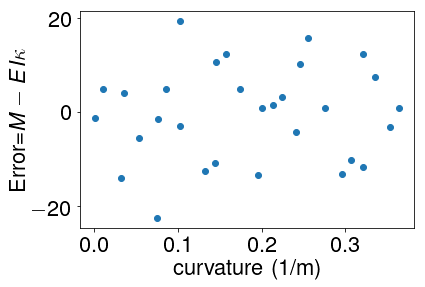

In [25]:
plt.plot(k*1e3,M-func(k,EI),'o')
plt.xlabel('curvature (1/m)')
plt.ylabel(r'Error=$M-EI\kappa$')

# Problem 3

If the thickness of the beam is not measured properly, you can have large systematic errors in your results. In the example above, the width of the beam was 12 mm and the thickness of the beam was 3 mm. On the line, 

`I = 12*3**3/12.0`

Change the thickness to 3.1 mm and calculate `E31`


In [ ]:
import check_lab02.py as p

p.check_p03(E31)

*Table 1: Fill in the measured and calculated values.*

|trial|distance, $r$| force= $mg$|strain (mm/mm)|curvature (1/mm)|Moment=$r\times F$|
|---|---|---|---|---|---|
|1|
|1|
|1|
|1|
|1|
|1|
|1|
|1|
|1|
|1|
|1|
|1|
|1|
|1|
|1|
|1|
|1|
|1|
|1|
|1|
|1|
|1|
|1|
|1|
|1|
|
|2|
|2|
|2|
|2|
|2|
|2|
|2|
|2|
|2|
|2|
|2|
|2|
|2|
|2|
|2|
|2|
|2|
|2|
|2|
|2|


### Your Report 

1. Introduction

  

2. Procedure


3. Results and Discussion


4. Conclusion


### References

References

0. Sutton, M. A., Orteu, J. J., & Schreier, H. (2009). Image correlation for shape, motion and deformation measurements: basic concepts, theory and applications. Springer Science & Business Media.

1. F.P. Beer and E.R. Johnson, Mechanics of Materials, 2nd Edition,
McGraw-Hill, 1992.

2. S. Chapra, Numerical Methods for Engineers, ch. 14-15, 6th Edition, McGraw-Hill, 2009.

3. [C. Salter, Error Analysis Using the Variance–Covariance Matrix, J. of Chem. Ed., 2000.](./least_squares-error_with_covariance.pdf)

3. [Euler-Bernoulli Beam Theory - Wikipedia](https://en.wikipedia.org/wiki/Euler%E2%80%93Bernoulli_beam_theory) 

4. [Uncertainty
Notes courses.washington.edu](https://courses.washington.edu/phys431/uncertainty_notes.pdf)